In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/canada-per-capita-income/canada_per_capita_income.csv


In [4]:
import matplotlib.pyplot as plt
from sklearn import linear_model
path="/kaggle/input/canada-per-capita-income/canada_per_capita_income.csv"
df=pd.read_csv(path)
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


Text(0.5, 1.0, 'Year vs Per Capita Income')

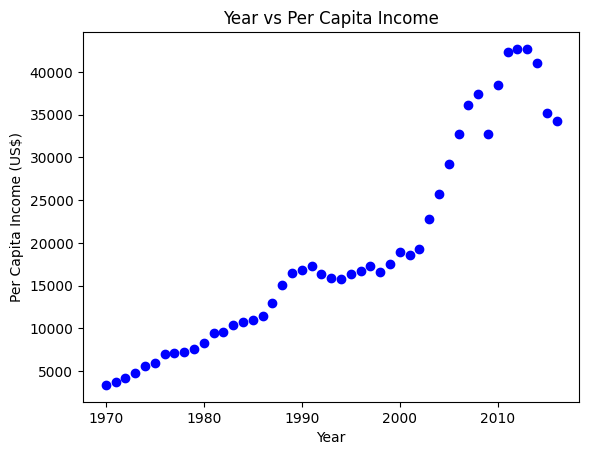

In [5]:

plt.scatter(df['year'], df['per capita income (US$)'], color='blue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.title('Year vs Per Capita Income')



# Linear regression

In [16]:
model=linear_model.LinearRegression()
model.fit(df[['year']],df['per capita income (US$)'] )

LinearRegression()

In [21]:
print(model.coef_)
print(model.intercept_)

[828.46507522]
-1632210.7578554575


In [22]:
print(828.46507522+(-1632210.7578554575)*2024)

-3303593745.434371


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['year']])
X_scaled

array([[-1.6955825 ],
       [-1.62186152],
       [-1.54814054],
       [-1.47441956],
       [-1.40069858],
       [-1.32697761],
       [-1.25325663],
       [-1.17953565],
       [-1.10581467],
       [-1.03209369],
       [-0.95837272],
       [-0.88465174],
       [-0.81093076],
       [-0.73720978],
       [-0.6634888 ],
       [-0.58976782],
       [-0.51604685],
       [-0.44232587],
       [-0.36860489],
       [-0.29488391],
       [-0.22116293],
       [-0.14744196],
       [-0.07372098],
       [ 0.        ],
       [ 0.07372098],
       [ 0.14744196],
       [ 0.22116293],
       [ 0.29488391],
       [ 0.36860489],
       [ 0.44232587],
       [ 0.51604685],
       [ 0.58976782],
       [ 0.6634888 ],
       [ 0.73720978],
       [ 0.81093076],
       [ 0.88465174],
       [ 0.95837272],
       [ 1.03209369],
       [ 1.10581467],
       [ 1.17953565],
       [ 1.25325663],
       [ 1.32697761],
       [ 1.40069858],
       [ 1.47441956],
       [ 1.54814054],
       [ 1

In [26]:
model.fit(X_scaled,df['per capita income (US$)'] )
print(model.coef_)
print(model.intercept_)
year_2024_scaled = scaler.transform(np.array([[2024]]))
model.predict(year_2024_scaled)

[11237.84703931]
18920.137063404254


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([44602.55439531])

# Gradient discent

In [6]:

X=np.array(df['year'])
Y=np.array(df['per capita income (US$)'])
print (X)
print(Y)

[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016]
[ 3399.299037  3768.297935  4251.175484  4804.463248  5576.514583
  5998.144346  7062.131392  7100.12617   7247.967035  7602.912681
  8355.96812   9434.390652  9619.438377 10416.53659  10790.32872
 11018.95585  11482.89153  12974.80662  15080.28345  16426.72548
 16838.6732   17266.09769  16412.08309  15875.58673  15755.82027
 16369.31725  16699.82668  17310.75775  16622.67187  17581.02414
 18987.38241  18601.39724  19232.17556  22739.42628  25719.14715
 29198.05569  32738.2629   36144.48122  37446.48609  32755.17682
 38420.52289  42334.71121  42665.25597  42676.46837  41039.8936
 35175.18898  34229.19363 ]


In [8]:
def gradient(x,y):
    
    m_cur=b_cur=0
    learning_rate=0.001
    iteration=100
    n=len(x)
    for i in range(iteration):
        y_predicted=m_cur+b_cur*x
        cost=(1/n)*sum([val**2 for val in (y-y_predicted)])
        m_derivation=-(2*n*(sum(x*(y-y_predicted))))
        b_derivation=-(2*n*(sum(y-y_predicted)))
        m_cur=m_cur-m_derivation*learning_rate
        b_cur=b_cur-b_derivation*learning_rate
        print(m_cur, b_cur, cost, i)
gradient(X, Y)

167266676.13464662 83589.16554611998 499723531.6384421 0
-2939394393329.1206 -1474825785.0636134 1.1145104882353211e+17 1
5.176084352286422e+16 25970719862125.375 3.4559774947780395e+25 2
-9.11474910254407e+20 -4.573275461833521e+17 1.0716615582840714e+34 3
1.6050482478634365e+25 8.053241712340619e+21 3.32310756432632e+42 4
-2.8263859476399967e+29 -1.4181236756594016e+26 1.0304600177844176e+51 5
4.977082486866481e+33 2.4972238898330877e+30 3.195346005802635e+59 6
-8.76431971428278e+37 -4.397449434763448e+34 9.908425286360723e+67 7
1.5433399035852953e+42 7.74362347326169e+38 3.072496420641363e+76 8
-2.717721552440639e+46 -1.3636019102713125e+43 9.527481897500674e+84 9
4.785731529031354e+50 2.4012145943252742e+47 2.954369961096809e+93 10
-8.427363078236113e+54 -4.228383287358022e+51 9.161184414657186e+101 11
1.4840040236605586e+59 7.445908944191044e+55 2.840785039941298e+110 12
-2.6132349132175675e+63 -1.3111763110724334e+60 8.808969755311132e+118 13
4.6017373287265724e+67 2.308896511632

/tmp/ipykernel_30/2193614194.py:9: RuntimeWarning: overflow encountered in scalar power
  cost=(1/n)*sum([val**2 for val in (y-y_predicted)])
/tmp/ipykernel_30/2193614194.py:10: RuntimeWarning: overflow encountered in scalar multiply
  m_derivation=-(2*n*(sum(x*(y-y_predicted))))
/tmp/ipykernel_30/2193614194.py:12: RuntimeWarning: invalid value encountered in scalar subtract
  m_cur=m_cur-m_derivation*learning_rate


# logistic regression

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
#Click here and press Shift+Enter
!wget -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

--2024-10-30 14:01:12--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [text/csv]
Saving to: 'ChurnData.csv'

ChurnData.csv       100%[===================>]  35.10K   135KB/s    in 0.3s    

2024-10-30 14:01:14 (135 KB/s) - 'ChurnData.csv' saved [35943/35943]



In [4]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [5]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


**How many rows and columns are in this dataset in total? What are the names of columns?**

In [6]:
churn_df.shape

(200, 10)

In [7]:
column_names = churn_df.columns.tolist()
print(column_names)

['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']


Let's define X, and y for our dataset:

In [8]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y=np.asarray(churn_df['churn'])
print(X)
print(y)

[[11. 33.  7. ...  5.  5.  0.]
 [33. 33. 12. ...  2.  0.  0.]
 [23. 30.  9. ...  1.  2.  0.]
 ...
 [ 6. 32. 10. ...  1. 10.  0.]
 [24. 30.  0. ...  4.  5.  0.]
 [61. 50. 16. ...  2. 22.  1.]]
[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]


In [10]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [13]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [14]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.42242662, 0.57757338],
       [0.72446168, 0.27553832],
       [0.65043571, 0.34956429],
       [0.51114797, 0.48885203],
       [0.50365184, 0.49634816],
       [0.54631088, 0.45368912],
       [0.56137795, 0.43862205],
       [0.469321  , 0.530679  ],
       [0.74490874, 0.25509126],
       [0.58282763, 0.41717237],
       [0.69266136, 0.30733864],
       [0.67637615, 0.32362385],
       [0.5577946 , 0.4422054 ],
       [0.58654315, 0.41345685],
       [0.68441104, 0.31558896],
       [0.55045439, 0.44954561],
       [0.55321582, 0.44678418],
       [0.69121584, 0.30878416],
       [0.58412238, 0.41587762],
       [0.50267756, 0.49732244],
       [0.74724422, 0.25275578],
       [0.80397796, 0.19602204],
       [0.55321363, 0.44678637],
       [0.6182759 , 0.3817241 ],
       [0.53874154, 0.46125846],
       [0.41775345, 0.58224655],
       [0.44926422, 0.55073578],
       [0.57631311, 0.42368689],
       [0.52708858, 0.47291142],
       [0.45078408, 0.54921592],
       [0.

In [15]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7058823529411765

confusion matrix


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  8]
 [ 2 24]]


Confusion matrix, without normalization
[[ 6  8]
 [ 2 24]]


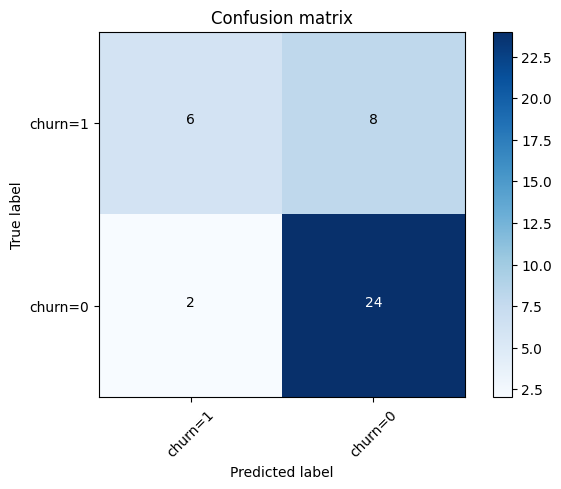

In [17]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

# Multiclass logistic Regression using handwritten data

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()


<Figure size 640x480 with 0 Axes>

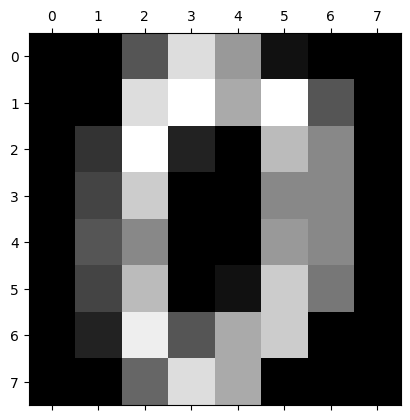

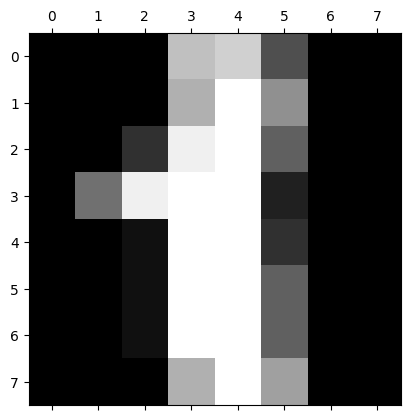

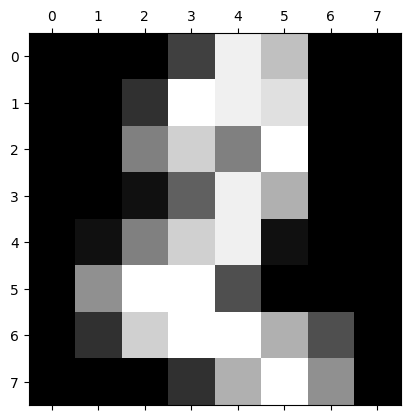

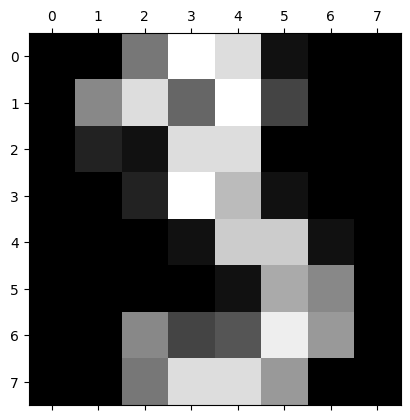

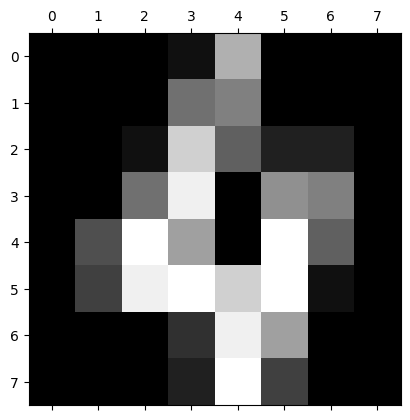

In [5]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [7]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( digits.data, digits.target, test_size=0.2)
X_train.shape

(1437, 64)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression()
LR.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
LR.score(X_test, y_test)

0.9611111111111111

In [15]:
LR.predict([digits.data[67]])

array([6])

# SVM

In [1]:
!wget -O cell_samples.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv

--2024-10-30 18:17:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19975 (20K) [text/csv]
Saving to: 'cell_samples.csv'

cell_samples.csv    100%[===================>]  19.51K  --.-KB/s    in 0s      

2024-10-30 18:17:26 (108 MB/s) - 'cell_samples.csv' saved [19975/19975]



In [5]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [9]:
cell_df=pd.read_csv("cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [10]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [11]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

/tmp/ipykernel_30/1178285181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [12]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [13]:
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [15]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [16]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

In [17]:
clf.score(X_test, y_test)

0.9635036496350365

In [18]:

clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train) 

SVC(kernel='linear')

In [19]:
clf_linear.score(X_test, y_test)

0.9635036496350365